In [1]:
import numpy as np
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from config import config

In [2]:
def read_mongo(collection, query={}):
    """ Read from Mongo and Store into DataFrame """

    # Make a query to the specific DB and Collection
    cursor = collection.find(query)
    
    elements = []
    for doc in cursor:
        del doc['_id']
        elements.append(doc)
        
    # Expand the cursor and construct the DataFrame
    df =  pd.DataFrame(elements)
    
    return df

In [3]:
REPO = 'internetarchive/openlibrary'

In [4]:
mongoClient = pymongo.MongoClient(config['DATABASE']['CONNECTION_STRING'])
db = mongoClient[config['DATABASE']['NAME']]
collection = db[f'{REPO}_results']

lastIssue = collection.find().sort('number', -1).limit(1)[0]['number']

df = read_mongo(collection, {'number': {'$gte': lastIssue - 6000}})
df.head()

,compare,filtros,number,tecnica,topk,acertos,arquivos,arquivos_resolvidos_de_verdade,arquivos_sugeridos,data,erros,issue,mapk,max_sim,mediana_sim,min_sim,repositorio
0,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",1726,tfidf,5,0,1,[static/css/legacy.less],"[openlibrary/templates/type/user/view.html, op...",2018-12-21T22:18:44Z,9,Optimise people page (historyPager) for mobile,0.0,0.179659,0.149414,0.096960,internetarchive/openlibrary
1,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",1729,tfidf,5,0,1,[static/css/components/dropper.less],[openlibrary/plugins/openlibrary/js/availabili...,2018-12-31T18:32:30Z,20,Lists widget overlaps the lists on the subject...,0.0,0.466188,0.271531,0.177031,internetarchive/openlibrary
2,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",1821,tfidf,5,0,1,[openlibrary/templates/search/subjects.html],"[openlibrary/templates/search/authors.html, st...",2019-01-17T19:26:13Z,14,Subject search page renders incorrectly,0.0,0.279961,0.181249,0.151501,internetarchive/openlibrary
3,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",1780,tfidf,5,0,1,[openlibrary/templates/lib/nav_foot.html],[openlibrary/templates/books/custom_carousel.h...,2019-01-18T23:55:20Z,31,Contact and support path paramter doesnt work,0.0,0.139960,0.000000,0.000000,internetarchive/openlibrary
4,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",1734,tfidf,5,0,2,"[static/css/components/buttonLink.less, static...",[openlibrary/templates/publishers/notfound.htm...,2019-01-18T23:55:34Z,60,Edit icon misaligned on books page,0.0,0.259492,0.150049,0.129424,internetarchive/openlibrary


# Histplot


<AxesSubplot: xlabel='number', ylabel='Count'>

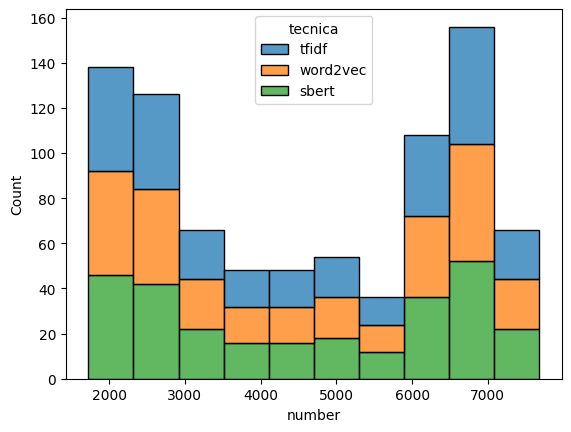

In [5]:
sns.histplot(df, x='number', bins=10, stat='count', hue='tecnica', multiple='stack')

# Mapk

<AxesSubplot: xlabel='topk', ylabel='mapk'>

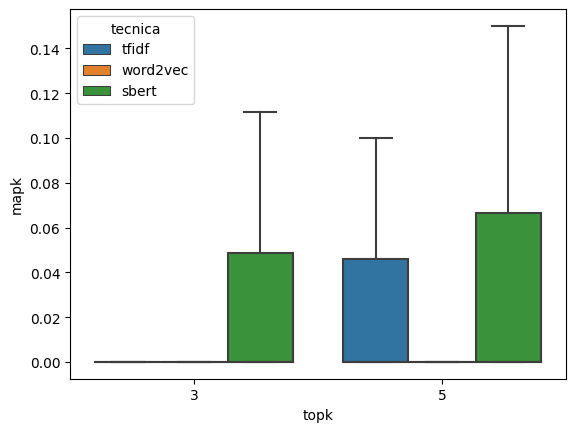

In [6]:
sns.boxplot(df, x="topk", y="mapk", hue="tecnica", showfliers=False)

# Similaridades maiores

<AxesSubplot: xlabel='topk', ylabel='max_sim'>

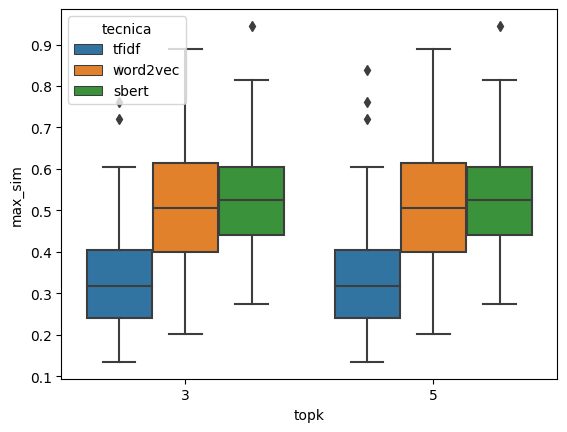

In [7]:
sns.boxplot(df, x="topk", y="max_sim", hue="tecnica")

# Similaridades menores

<AxesSubplot: xlabel='topk', ylabel='min_sim'>

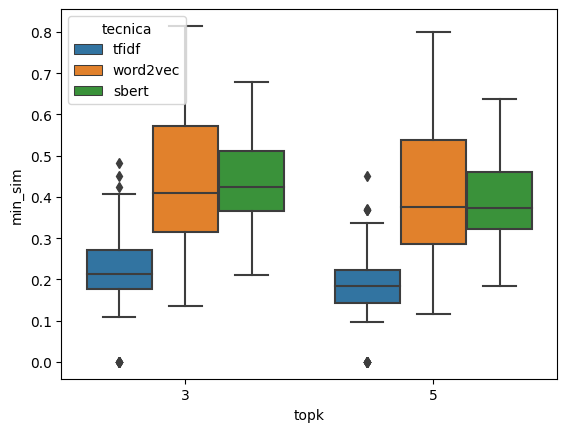

In [8]:
sns.boxplot(df, x="topk", y="min_sim", hue="tecnica")

# Acertos

<AxesSubplot: xlabel='topk', ylabel='acertos'>

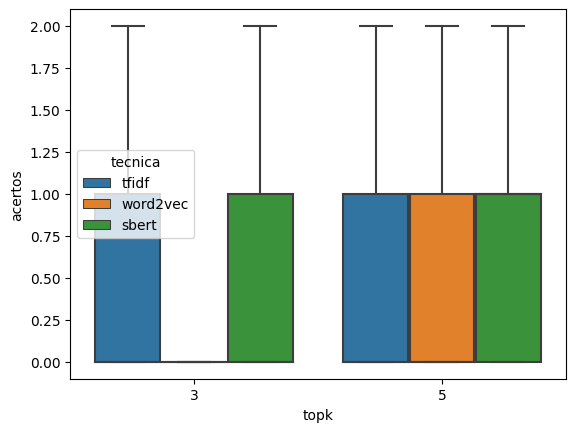

In [9]:
sns.boxplot(df, x="topk", y="acertos", hue="tecnica", showfliers=False)

<AxesSubplot: xlabel='topk', ylabel='acertos'>

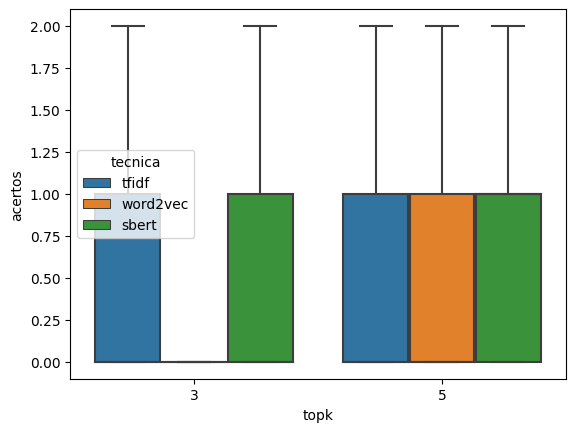

In [10]:
sns.boxplot(df, x="topk", y="acertos", hue="tecnica", showfliers=False)